In [11]:
from ModellingScript import *

import warnings

from matplotlib import cm
# Visualization tool for the elbow method to determine the optimal number of clusters
from yellowbrick.cluster.elbow import kelbow_visualizer

# Calculates the Silhouette Score which measures the quality of clusters
from sklearn.metrics import silhouette_score
# KMeans clustering algorithm
from sklearn.cluster import KMeans, DBSCAN
# Splits data into random train and test subsets
from sklearn.model_selection import train_test_split

# Preprocessing tool to standardize features (mean=0, variance=1)
from sklearn.preprocessing import StandardScaler

In [5]:
# set the string column(s)
str_cols = ['Account Description', 'Year Month (after 2000) in Datetime', 'Size']
# extract numerical columns
num_cols = list(df.columns.difference(str_cols))

# convert num_cols column(s) to numerical
df[num_cols] = df[num_cols].astype(float)

# choose which columns to drop
df_num = df.drop(str_cols, axis=1)
df_num.head(3)

,Account Description ID,Type,Size Numeric,Strength (mg),WHO ATC 5 Code,Volume,Value,Year Month (after 2000),Region_Hovedstaden,Region_Midtjylland,Region_Nordjylland,Region_Sjælland,Region_Syddanmark,Product_Cimzia,Product_Inflectra,Product_Remicade,Product_Remsima,Product_Stelara,Product_Zessly
0,0.0,0.0,100.0,100.0,0.0,238.0,1048818.4,1001.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,100.0,100.0,0.0,206.0,907800.8,1002.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,2.0,200.0,1.0,8.0,64668.4,1003.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Initialize the StandardScaler object
# StandardScaler standardizes the dataset by setting the mean to 0 and variance to 1
scaler = StandardScaler()

# Fit and transform the DataFrame using StandardScaler
# The output will be a NumPy array of scaled features
df_scaled_full = scaler.fit_transform(df_num)

# Convert the NumPy array back to a DataFrame and use original column names
# Now df_scaled contains the scaled features of the original DataFrame
df_scaled_full = pd.DataFrame(df_scaled_full, columns=df_num.columns)
df_scaled_full.head()

,Account Description ID,Type,Size Numeric,Strength (mg),WHO ATC 5 Code,Volume,Value,Year Month (after 2000),Region_Hovedstaden,Region_Midtjylland,Region_Nordjylland,Region_Sjælland,Region_Syddanmark,Product_Cimzia,Product_Inflectra,Product_Remicade,Product_Remsima,Product_Stelara,Product_Zessly
0,-1.038946,-1.855429,4.713921,-0.031250,-1.360480,0.115921,0.125680,-1.91229,-0.333172,-0.478033,-0.397204,1.882714,-0.683859,-0.470210,-0.171742,1.950649,-0.245546,-1.019682,-0.125727
1,-1.038946,-1.855429,4.713921,-0.031250,-1.360480,0.057631,0.058226,-1.90859,-0.333172,-0.478033,-0.397204,1.882714,-0.683859,-0.470210,-0.171742,1.950649,-0.245546,-1.019682,-0.125727
2,-1.038946,-1.855429,-0.171965,1.898489,-0.227269,-0.303041,-0.345077,-1.90489,-0.333172,-0.478033,-0.397204,1.882714,-0.683859,2.126709,-0.171742,-0.512650,-0.245546,-1.019682,-0.125727
3,-1.038946,-1.855429,4.713921,-0.031250,-1.360480,0.319937,0.361770,-1.90489,-0.333172,-0.478033,-0.397204,1.882714,-0.683859,-0.470210,-0.171742,1.950649,-0.245546,-1.019682,-0.125727
4,-1.038946,-1.855429,-0.171965,1.898489,-0.227269,-0.284825,-0.306411,-1.90119,-0.333172,-0.478033,-0.397204,1.882714,-0.683859,2.126709,-0.171742,-0.512650,-0.245546,-1.019682,-0.125727


#### K-means clustering

In [9]:
features = ['Volume','Year Month (after 2000)','WHO ATC 5 Code',]
Nfeatures = len(features)
df_scaled = df_scaled_full[features]
df_scaled.head(3)

,Volume,Year Month (after 2000),WHO ATC 5 Code
0,0.115921,-1.91229,-1.360480
1,0.057631,-1.90859,-1.360480
2,-0.303041,-1.90489,-0.227269


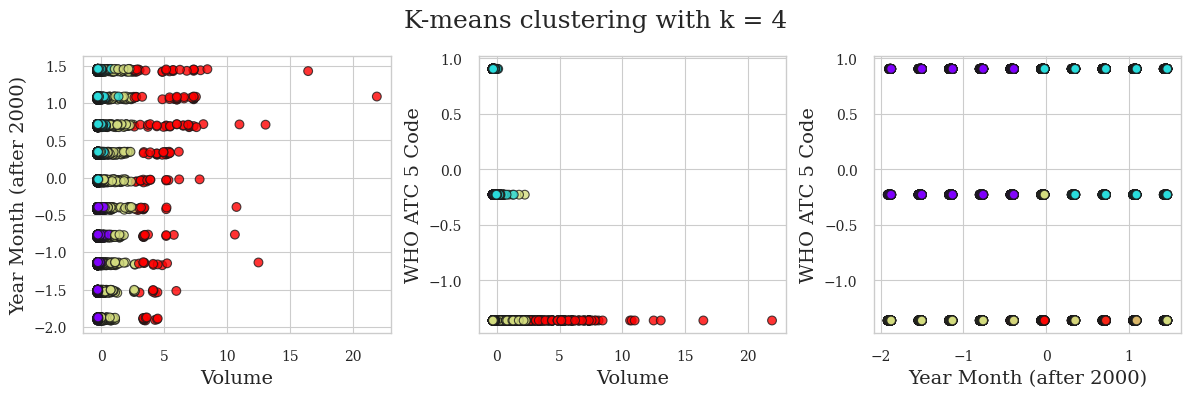

In [12]:
# Set number of clusters
nclusters = 4

# Initialize K-means algorithm with 4 clusters
# This initializes a KMeans object that will segment the data into 17 clusters
kmeans = KMeans(n_clusters=nclusters, n_init = 5,)

# Fit the K-means algorithm to the scaled data
# The fit method computes centroids of 4 clusters in the scaled feature space

with warnings.catch_warnings(): # ignore warnings
    warnings.simplefilter("ignore", category=UserWarning)
    kmeans.fit(df_scaled)

# Retrieve the cluster labels
# After fitting, each instance in df_scaled is assigned to one of the 17 clusters
labels = kmeans.labels_

# Shift labels
shifted_labels = labels + 1

# Create a 2D scatter plots to visualize the clustering
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
fig.suptitle(f"K-means clustering with k = {nclusters}", fontsize=18)

ax[0].scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], cmap = 'rainbow', c=labels, edgecolor='k', s=40, alpha=0.8)
ax[1].scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 2], cmap = 'rainbow', c=labels, edgecolor='k', s=40, alpha=0.8)
ax[2].scatter(df_scaled.iloc[:, 1], df_scaled.iloc[:, 2], cmap = 'rainbow', c=labels, edgecolor='k', s=40, alpha=0.8)

ax[0].set(xlabel = features[0], ylabel = features[1])
ax[1].set(xlabel = features[0], ylabel = features[2])
ax[2].set(xlabel = features[1], ylabel = features[2])
fig.tight_layout()

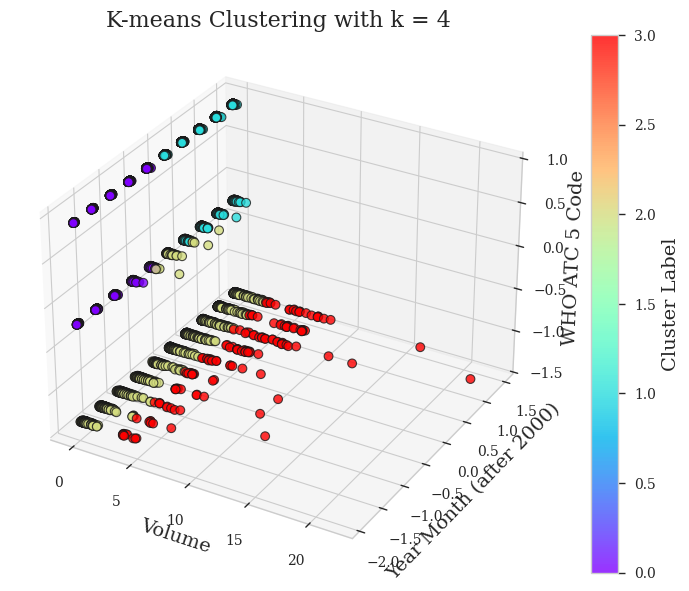

In [13]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using first three features for the x, y, and z-axis
sc = ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 2], 
                c=labels, cmap='rainbow', edgecolor='k', s=40, alpha=0.8)

# Add titles and labels
plt.title(f"K-means Clustering with k = {nclusters}")
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])

# Add a color bar
plt.colorbar(sc, label='Cluster Label')
plt.tight_layout()